# Real Estate Price Prediction

User want to know the price of the house of unit area depends on 6 parameter as mentioned below.
Transaction date, house age, distance to the nearest MRT station, number of convenience stores in the living circle, geographic coordinate latitude, geographic coordinate longitude.

- Attribute Information:

- The inputs are as follows
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

# Importing required libraries for the project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Loading real estate dataset from git hub account

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Realdf = pd.read_csv('https://raw.githubusercontent.com/Manju410/MLPractice/main/Real_Estate_Price_Prediction/RealEstatCleanUp.csv')
Realdf = pd.read_csv('/content/drive/MyDrive/RealEstatCleanUp.csv')

In [ ]:
Realdf.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,734808,32.0,84.87882,10,24.98298,121.54024,37.9
1,734808,19.5,306.59470,9,24.98034,121.53951,42.2
2,735050,13.3,561.98450,5,24.98746,121.54391,47.3
3,735020,13.3,561.98450,5,24.98746,121.54391,54.8
4,734777,5.0,390.56840,5,24.97937,121.54245,43.1


- Number of rows and columns in the dataset

In [ ]:
Realdf.shape

(414, 7)

- There are 414 rows and 8 columns in the above dataset

- Information about dataset like datatype,count etc

In [ ]:
Realdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int64  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


# Summary of above output
- Above dataset contains 8 columns.
- Two columns are integer datatype and Six columns are float datatype.
- Above dataset doesnot have any null values or empty values.
- Above dataset have 414 etries total

- Extract Train Test Dataset

- -1 = except last column( house price of unit area) loading all rows and columns to X variable

In [ ]:
X = Realdf.iloc[:,:-1]
y = Realdf['Y house price of unit area'].values.reshape(-1,1)

- Converting y values to 2 dimensional array

In [ ]:
X.shape,y.shape

((414, 6), (414, 1))

In [ ]:
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,734808,32.0,84.87882,10,24.98298,121.54024
1,734808,19.5,306.59470,9,24.98034,121.53951
2,735050,13.3,561.98450,5,24.98746,121.54391
3,735020,13.3,561.98450,5,24.98746,121.54391
4,734777,5.0,390.56840,5,24.97937,121.54245


# Spliting data to train and test lists

- test size =0.25 : Assigning 25% of dataset to test and 75% of dataset to train.
- random state : it will assign same set of rows to every batch to test the module.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1234)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((310, 6), (104, 6), (310, 1), (104, 1))

# Lets Change Distance from meter to Kilometers

In [ ]:
X_train1 = X_train.copy()

In [ ]:
X_train1[X_train1.columns[2]] = X_train1[X_train1.columns[2]]/1000
X_train1.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
268,734989,17.2,0.390568,5,24.97937,121.54245
337,734777,31.3,0.600860,5,24.96871,121.54651
36,734808,14.7,1.935009,2,24.96386,121.51458
351,734777,4.0,2.180245,3,24.96324,121.51241
278,734747,0.0,0.208391,6,24.95618,121.53844


In [ ]:
X_test1 = X_test.copy()
X_test1[X_test1.columns[2]] = X_test1[X_test1.columns[2]]/1000
X_test1.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
101,734777,12.7,0.170129,1,24.97371,121.52984
181,734900,11.6,0.201894,8,24.98489,121.54121
64,734959,17.5,0.995755,0,24.96305,121.54915
149,734716,34.9,0.179454,8,24.97349,121.54245
270,734959,10.8,0.252582,1,24.97460,121.53046


# Linear Regression Model

- Due to predict price of house which is continuous variable we are using Linear Regression model to predict the house price.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrmodel = LinearRegression()
lrmodel.fit(X_train1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Checking intercept and slope for the dataset

In [ ]:
np.get_printoptions()

{'edgeitems': 3,
 'floatmode': 'maxprec',
 'formatter': None,
 'infstr': 'inf',
 'legacy': False,
 'linewidth': 75,
 'nanstr': 'nan',
 'precision': 8,
 'sign': '-',
 'suppress': False,
 'threshold': 1000}

- Checking co_efficient and intercept values from linear regression model.

In [ ]:
c = lrmodel.intercept_
m = lrmodel.coef_
c,m

(array([-12636.5783771]),
 array([[ 8.10139337e-03, -2.26771910e-01, -4.44209435e+00,
          1.12984878e+00,  2.30297847e+02,  8.01805979e+00]]))

- Above output giving in exponensial values: to convert into normal values we using below with statement

In [ ]:
with np.printoptions(precision=3, suppress=True):
  print(m,c)

[[  0.008  -0.227  -4.442   1.13  230.298   8.018]] [-12636.578]


In [ ]:
Realdf.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [ ]:
coeffdf =  pd.DataFrame({'col':X.columns,'coeff':m[0]})
coeffdf

,col,coeff
0,X1 transaction date,0.008101
1,X2 house age,-0.226772
2,X3 distance to the nearest MRT station,-4.442094
3,X4 number of convenience stores,1.129849
4,X5 latitude,230.297847
5,X6 longitude,8.018060


- Inference from above output

- X5 latitude column have high impact on price of house.
- if X3 distance increases than house of price reduces due to negative slop
- X1 transaction date is very low impact on price of house

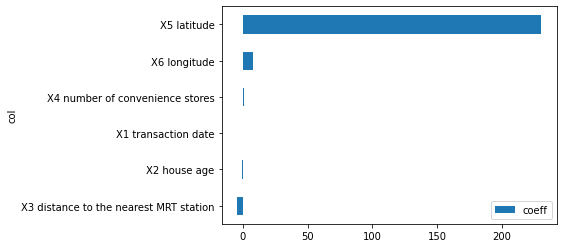

In [ ]:
coeffdf.sort_values('coeff').set_index('col').plot.barh()

- Prdecting for X_train to check how model learnt from given data

In [ ]:
y_learntdf = lrmodel.predict(X_train1)
y_learntdf[:5]

array([[45.10021581],
       [36.82867785],
       [30.15531324],
       [32.21093297],
       [43.60649619]])

In [ ]:
learndf = pd.DataFrame({'Actual':y_train[:,0],'Learnt':y_learntdf[:,0]})
learndf.head()

,Actual,Learnt
0,40.1,45.100216
1,30.9,36.828678
2,22.9,30.155313
3,28.6,32.210933
4,44.0,43.606496


- ploting bar graph to visuialaize actual and learnt values

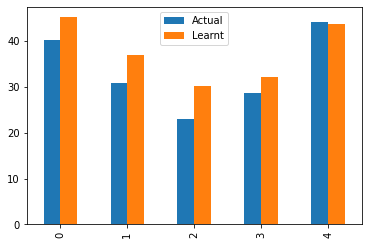

In [ ]:
learndf.head().plot(kind='bar')

# Inference from above Graph
- As we including all the columns and converted distance to MRT station column from meter to Kilometer : Error has been increased.

# importing metrics from sklearn to check mean square error

- We are using metrics to check accuracy of our model.
- Using mean square error we can check how difference between actual and predicted values.

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
train_mse = mse(y_train,y_learntdf)
train_mse

67.21018854523652

In [ ]:
rmse_train = np.sqrt(train_mse)
rmse_train

8.19818202684208

- As per above result we have 67.24 training mean square error.
- rmse is root mean square

- predicting for test data set

In [ ]:
testdf = lrmodel.predict(X_test1)
testdf[:5]

array([[39.45841839],
       [51.1380725 ],
       [32.7468609 ],
       [41.8478586 ],
       [41.20740955]])

In [ ]:
test = pd.DataFrame({'Actual':y_test[:,0],'Pred':testdf[:,0]})
test.head()

,Actual,Pred
0,32.9,39.458418
1,55.9,51.138073
2,25.3,32.746861
3,39.7,41.847859
4,117.5,41.207410


In [ ]:
test_mse = mse(y_test,testdf)
test_mse

112.25372379423804

In [ ]:
rmse_test = np.sqrt(test_mse)
rmse_test

10.594985785466541

- Above values shows that total difference between actual and predicted values for test dataset is 112 - erorr

# R2 score

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_real = r2_score(y_test,testdf)
r2_real

0.47164135409645547

- R2 score will tell how much accurate and effecient your model is.
- From above values we can see that our model is 47% accurate results.

In [ ]:
y_mean = Realdf['Y house price of unit area'].mean()**2
y_mean

1442.4950782982105

In [ ]:
n= X.shape[0]
k= X.shape[1]
n,k

(414, 6)

In [ ]:
Adj_R2 = 1-(((1-r2_real)*(n-1))/(n-k-1))
Adj_R2

0.46385228314947446

- As we included 6 columns in the dataset and r2 score is 47% 
- our Adjusted R2 score is 46%

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
folds = KFold(n_splits=5,shuffle=False,random_state=1234)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
dir(folds)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_iter_test_indices',
 '_iter_test_masks',
 'get_n_splits',
 'n_splits',
 'random_state',
 'shuffle',
 'split']

In [ ]:
folds.split?

In [ ]:
for data in folds.split(range(10)):
  print('train:',data[0])
  print('test:',data[1])
  print('-'*30)

train: [2 3 4 5 6 7 8 9]
test: [0 1]
------------------------------
train: [0 1 4 5 6 7 8 9]
test: [2 3]
------------------------------
train: [0 1 2 3 6 7 8 9]
test: [4 5]
------------------------------
train: [0 1 2 3 4 5 8 9]
test: [6 7]
------------------------------
train: [0 1 2 3 4 5 6 7]
test: [8 9]
------------------------------


In [ ]:
for data in KFold(n_splits=4,shuffle=True,random_state=74).split(range(12)):
  print('train:',data[0])
  print('test:',data[1])
  print('-'*30)

train: [ 1  2  3  4  6  8  9 10 11]
test: [0 5 7]
------------------------------
train: [ 0  1  4  5  7  8  9 10 11]
test: [2 3 6]
------------------------------
train: [ 0  2  3  5  6  7  9 10 11]
test: [1 4 8]
------------------------------
train: [0 1 2 3 4 5 6 7 8]
test: [ 9 10 11]
------------------------------


In [ ]:
new_modle = LinearRegression()

In [ ]:
X_new = pd.concat([X_train1,X_test1])
X_new.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
268,734989,17.2,0.390568,5,24.97937,121.54245
337,734777,31.3,0.600860,5,24.96871,121.54651
36,734808,14.7,1.935009,2,24.96386,121.51458
351,734777,4.0,2.180245,3,24.96324,121.51241
278,734747,0.0,0.208391,6,24.95618,121.53844


In [ ]:
X_new.shape

(414, 6)

In [ ]:
X_new = X_new.reset_index().drop('index',axis=1)

In [ ]:
pd.DataFrame(y_train,columns=['Price'])

,Price
0,40.1
1,30.9
2,22.9
3,28.6
4,44.0
...,...
305,26.6
306,38.9
307,38.1
308,43.5


In [ ]:
y_new = pd.concat([pd.DataFrame(y_train,columns=['Price']),pd.DataFrame(y_test,columns=['Price'])])
y_new.head()

,Price
0,40.1
1,30.9
2,22.9
3,28.6
4,44.0


In [ ]:
y_new.shape

(414, 1)

In [ ]:
lrmodel.score(X_test1,y_test)

0.4716413540964555

In [ ]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(new_modle,X_new,y_new,
                         cv=KFold(n_splits=4,shuffle=True,random_state=1234),
                         scoring='r2')

In [ ]:
scores

array([0.6636441 , 0.4231111 , 0.59934973, 0.55955566])

In [ ]:
scores.mean()

0.5614151480462419